In [ ]:
# !pip install extra_keras_datasets

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

In [5]:
def show_version(pkg):
    print("{0:20}: {1}".format(pkg.__name__, pkg.__version__))
    
show_version(np)
show_version(matplotlib)
show_version(tf)
show_version(keras)

#Step:1-3
# EMNIST-Letters  : https://www.nist.gov/itl/products-and-services/emnist-dataset
(t_images, t_labels), (v_images, v_labels) = emnist.load_data(type="letters")

def show_data_info(label, data):
    print("{:12}: {}, {}".format(label, data.dtype, data.shape))
    
def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
    return img

def show_image(img):
    plt.rcParams["font.size"] = 10
    plt.figure()
    plt.imshow(compatible_image(img))
    plt.colorbar()
    plt.grid(False)
    plt.show()

INFO:root:Loading dataset = emnist


numpy               : 1.19.2
matplotlib          : 3.3.2
tensorflow          : 2.4.1
tensorflow.keras    : 2.4.0


t_images    : uint8, (124800, 28, 28)
t_labels    : uint8, (124800,)
v_images    : uint8, (20800, 28, 28)
v_labels    : uint8, (20800,)


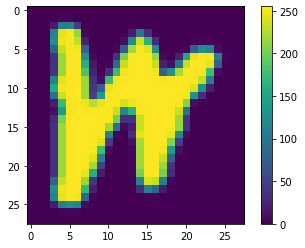

In [6]:
# Step 1-4
# 28*28 픽셀 이미지 데이터, 훈련데이터 124800, 평가데이터 20800
# 27개의 분류, 0~26 정답레이블. 1=A, 2=B, ..., 26=Z
show_data_info("t_images", t_images)  # 3차원
show_data_info("t_labels", t_labels)
show_data_info("v_images", v_images)
show_data_info("v_labels", v_labels)
show_image(t_images[0])

t_images    : float32, (124800, 28, 28, 1)
v_images    : float32, (20800, 28, 28, 1)


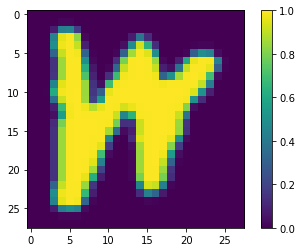

In [7]:
# Step 1-5
# 1) 이미지가 3차원(124800, 28, 28), CNN에서는 4차원 형상으로 변환
#   => (1248, 28, 28, 1) : 회색으로 사용하겠다. (batch, height, width, channel)

def adjust_image(img):
    img = img.astype('float32')
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1)  # 3D -> 4D
    return img

t_images = adjust_image(t_images)
v_images = adjust_image(v_images)

show_data_info("t_images", t_images)  # 3차원
show_data_info("v_images", v_images)
show_image(t_images[0])

In [14]:
# step 1-6  모델 정의
# 순차 모델 Conv2D(3) -> MaxPooling2D() -> Conv2D(3) -> MaxPooling2D() -> Flatten()
#   -> Dense(128) -> Dense(27)
import keras
from keras import layers
from keras import models
from keras import optimizers

# 순차 모델 생성
model = models.Sequential()

# Conv2D -> 4
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Conv2D(32, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))

# 1차원
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
          
# 출력
model.add(layers.Dense(27, activation='softmax'))

# step 1-7
opt = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.summary()  # 모델 정보 확인

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 64)         

In [15]:
# step 1-8
history = model.fit(t_images, t_labels, epochs=20, batch_size=128,
                   validation_data=(v_images, v_labels),   # 검증용 데이터 전달
                   verbose=2)

Epoch 1/20
975/975 - 163s - loss: 0.7881 - accuracy: 0.7559 - val_loss: 0.2574 - val_accuracy: 0.9163
Epoch 2/20
975/975 - 164s - loss: 0.3282 - accuracy: 0.8961 - val_loss: 0.2221 - val_accuracy: 0.9283
Epoch 3/20
975/975 - 161s - loss: 0.2676 - accuracy: 0.9152 - val_loss: 0.1994 - val_accuracy: 0.9343
Epoch 4/20
975/975 - 165s - loss: 0.2388 - accuracy: 0.9229 - val_loss: 0.1892 - val_accuracy: 0.9380
Epoch 5/20
975/975 - 164s - loss: 0.2206 - accuracy: 0.9285 - val_loss: 0.1860 - val_accuracy: 0.9390
Epoch 6/20
975/975 - 162s - loss: 0.2066 - accuracy: 0.9327 - val_loss: 0.1744 - val_accuracy: 0.9425
Epoch 7/20
975/975 - 163s - loss: 0.1950 - accuracy: 0.9357 - val_loss: 0.1754 - val_accuracy: 0.9425
Epoch 8/20
975/975 - 159s - loss: 0.1856 - accuracy: 0.9382 - val_loss: 0.1758 - val_accuracy: 0.9419
Epoch 9/20
975/975 - 159s - loss: 0.1764 - accuracy: 0.9405 - val_loss: 0.1707 - val_accuracy: 0.9459
Epoch 10/20
975/975 - 159s - loss: 0.1694 - accuracy: 0.9422 - val_loss: 0.1740 - 

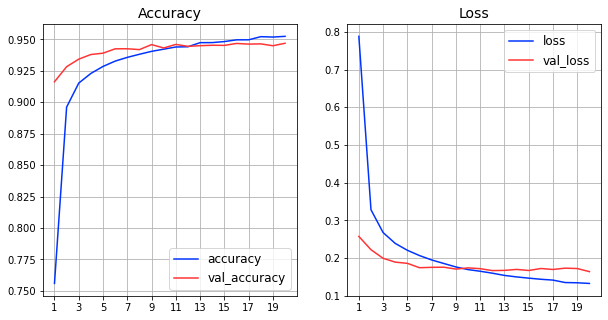

In [16]:
#step 1-9

def show_history(history):
    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    t_col = "#03F"
    v_col = "#F33"
    
    ax[0].set_title("Accuracy", fontsize=14)
    ax[0].plot(history.history["accuracy"], color=t_col, label="accuracy")
    ax[0].plot(history.history["val_accuracy"], color=v_col, label="val_accuracy")
    ax[1].set_title("Loss", fontsize=14)
    ax[1].plot(history.history["loss"], color=t_col, label="loss")
    ax[1].plot(history.history["val_loss"], color=v_col, label="val_loss")
    x_pos = np.arange(0, len(history.epoch), 2)
    
    for x in ax:
        x.set_xticks(x_pos)
        x.set_xticklabels(x_pos + 1)
        x.grid(True)
        x.legend(fontsize=12)
        
    plt.show()
    
show_history(history)

# 파란선이 훈련데이터, 빨간선이 검증데이터

In [17]:
# step 1-10 : 모델 저장
model.save('my-model.h5')